In [1]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings('ignore')


### Load the training data:
* normalize XYZ with the 1st Atom
* get the distance of each 2 Atoms
* get the angle of each 3 Atoms
* get the angle of each 5 Atoms

In [2]:
PATH = 'test01.pdb' 
#PATH = 'test01A.pdb' 
#PATH = 'test01B.pdb' 
#PATH = 'test01C.pdb' 

In [3]:
data = pd.read_csv(PATH,sep='\s+')

data.columns = ['REMARK','4','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998']
display(data)

,REMARK,4,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998
ATOM,1,C1,OLA,1,44.29,24.62,58.04,1.0,0.0
ATOM,2,C2,OLA,1,44.63,25.19,56.66,1.0,0.0
ATOM,3,C3,OLA,1,46.04,24.71,56.29,1.0,0.0
ATOM,4,C4,OLA,1,46.63,25.14,54.94,1.0,0.0
ATOM,5,C5,OLA,1,48.05,24.57,54.94,1.0,0.0
...,...,...,...,...,...,...,...,...,...
ATOM,80,C17,OLA,4,13.33,3.74,85.90,1.0,0.0
ATOM,81,C18,OLA,4,14.17,4.44,84.83,1.0,0.0
ATOM,82,O19,OLA,4,14.77,3.94,83.89,1.0,0.0
ATOM,83,O20,OLA,4,14.23,5.79,84.99,1.0,0.0


### Get the angle of each 3 Atoms

In [4]:
def angle_sign2(p1, p2, p3):
    p1 = list(p1)
    p2 = list(p2)
    p3 = list(p3)
    d1 = np.array(p1) - np.array(p2)
    d2 = np.array(p2) - np.array(p3)
    res = np.dot(d1, d2)
    return 1 if  res> 0 else -1

def get_angle(a, b, c):
    ba = a - b
    bc = c - b
    cosine_angle = np.dot(ba, bc) / (np.linalg.norm(ba) * np.linalg.norm(bc))
    angle = np.arccos(cosine_angle)
    #sign = angle_sign2(a, b, c)
    return(np.degrees(angle))

def dots_angle(data):
    #data = data0.copy()
    data.index = range(len(data))
    angles = [0]
    for k in range(len(data)-2):
        a = data.loc[k, ['X', 'Y', 'Z']]
        b = data.loc[k+1, ['X', 'Y', 'Z']]
        c = data.loc[k+2, ['X', 'Y', 'Z']]
        angles.append(get_angle(a, b, c))
    angles.append(0)
    return(angles)

In [5]:
data['dots-angle'] = dots_angle(data)
display(data)

,REMARK,4,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998,dots-angle
0,1,C1,OLA,1,44.29,24.62,58.04,1.0,0.0,0.000000
1,2,C2,OLA,1,44.63,25.19,56.66,1.0,0.0,107.748079
2,3,C3,OLA,1,46.04,24.71,56.29,1.0,0.0,118.529798
3,4,C4,OLA,1,46.63,25.14,54.94,1.0,0.0,104.618734
4,5,C5,OLA,1,48.05,24.57,54.94,1.0,0.0,110.738952
...,...,...,...,...,...,...,...,...,...,...
79,80,C17,OLA,4,13.33,3.74,85.90,1.0,0.0,109.614374
80,81,C18,OLA,4,14.17,4.44,84.83,1.0,0.0,128.339073
81,82,O19,OLA,4,14.77,3.94,83.89,1.0,0.0,32.665938
82,83,O20,OLA,4,14.23,5.79,84.99,1.0,0.0,140.573392


### Normalize XYZ with the 1st Atom

In [6]:
data[['X','Y','Z']] = data[['X','Y','Z']] - data.loc[0, ['X','Y','Z']]
display(data)

,REMARK,4,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998,dots-angle
0,1,C1,OLA,1,0,0,0,1.0,0.0,0.000000
1,2,C2,OLA,1,0.34,0.57,-1.38,1.0,0.0,107.748079
2,3,C3,OLA,1,1.75,0.09,-1.75,1.0,0.0,118.529798
3,4,C4,OLA,1,2.34,0.52,-3.1,1.0,0.0,104.618734
4,5,C5,OLA,1,3.76,-0.05,-3.1,1.0,0.0,110.738952
...,...,...,...,...,...,...,...,...,...,...
79,80,C17,OLA,4,-30.96,-20.88,27.86,1.0,0.0,109.614374
80,81,C18,OLA,4,-30.12,-20.18,26.79,1.0,0.0,128.339073
81,82,O19,OLA,4,-29.52,-20.68,25.85,1.0,0.0,32.665938
82,83,O20,OLA,4,-30.06,-18.83,26.95,1.0,0.0,140.573392


### Get the distance of each 2 Atoms

In [7]:
def p1p2(p1, p2):
    squared_dist = np.sum((p1-p2)**2, axis=0)
    dist = np.sqrt(squared_dist)
    return dist

def dots_distance(data0):
    data = data0.copy()
    data.index = range(len(data))
    distances = []
    for k in range(len(data)-1):
        p1 = data.loc[k, ['X', 'Y', 'Z']]
        p2 = data.loc[k+1, ['X', 'Y', 'Z']]
        #squared_dist = np.sum((p1-p2)**2, axis=0)
        #dist = np.sqrt(squared_dist)
        #distances.append(dist)
        d1 = p1p2(p1, p2)
        distances.append(d1)
    distances.append(0)
    return(distances)

In [8]:
data['dots-distance'] = dots_distance(data)
display(data)

,REMARK,4,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998,dots-angle,dots-distance
0,1,C1,OLA,1,0,0,0,1.0,0.0,0.000000,1.531307
1,2,C2,OLA,1,0.34,0.57,-1.38,1.0,0.0,107.748079,1.534731
2,3,C3,OLA,1,1.75,0.09,-1.75,1.0,0.0,118.529798,1.534764
3,4,C4,OLA,1,2.34,0.52,-3.1,1.0,0.0,104.618734,1.530131
4,5,C5,OLA,1,3.76,-0.05,-3.1,1.0,0.0,110.738952,1.528692
...,...,...,...,...,...,...,...,...,...,...,...
79,80,C17,OLA,4,-30.96,-20.88,27.86,1.0,0.0,109.614374,1.529869
80,81,C18,OLA,4,-30.12,-20.18,26.79,1.0,0.0,128.339073,1.222129
81,82,O19,OLA,4,-29.52,-20.68,25.85,1.0,0.0,32.665938,2.219031
82,83,O20,OLA,4,-30.06,-18.83,26.95,1.0,0.0,140.573392,1.005037


### Get the angle of each 4 Atoms

In [9]:
# calculate the singe (+/-) of two planes A and B
# A=(p1, p2, p3); B=(p2,p3,p4)
def angle_sign(p1, p2, p3, p4):
    p1 = list(p1)
    p2 = list(p2)
    p3 = list(p3)
    p4 = list(p4)
    d1 = np.array(p1) - np.array(p2)
    d2 = np.array(p2) - np.array(p3)
    d3 = np.array(p3) - np.array(p4)
    # (d1 x d2) * d3
    res = np.dot(np.cross(d1, d2), d3)
    return 1 if  res> 0 else -1

In [10]:
p1 = np.array([0, 0, 0])
p2 = np.array([1,0,0])
p3 = np.array([2,1,0])
p4 = np.array([2.34, 0.52, 3.1])

In [11]:
angle_sign(p1, p2, p3, p4)
angle_sign2(p2, p3, p4)

-1

In [12]:
np.linalg.det(np.array([p2, p3, [0,0,1]]) )

1.0

In [13]:
np.abs(-1)

1

In [14]:
np.cross(p3-p1, p3-p2) + p3

array([2, 1, 1])

In [15]:
alpha = get_angle(p1, p2, p3)
alpha

135.0

In [16]:
np.cos((180-alpha) *np.pi/180)

0.7071067811865476

In [17]:
c_norm = np.linalg.norm(p3-p2)
b_norm = np.linalg.norm(p2-p1)

In [18]:
p4 = (p2-p1) + (p2-p1) * (c_norm/b_norm)*np.cos((180-alpha) *np.pi/180) + p1

In [19]:
p5 = (p4-p3) + (p4-p3) + p4

In [20]:
np.cos((180-45) *np.pi/180)

-0.7071067811865475

In [21]:
def dots_extend_mirror(a, b, c):
    a = np.array(list(a))
    b = np.array(list(b))
    c = np.array(list(c))
    v_ab = b - a # vector from point b to a
    v_bc = c - b # vector from point c to b
    c_norm = np.linalg.norm(v_bc) # norm of vector bc
    b_norm = np.linalg.norm(v_ab) # # norm of vector ab
    alpha = get_angle(a, b, c) # dots angle between a, b, c
    v_ad = v_ab + v_ab * (c_norm/b_norm)*np.cos((180-alpha) *np.pi/180) # vector ad extended from vector ab 
    d = v_ad + a # coordinates of middel point d, which is extended from vector ab
    v_cd = d - c # vector from point c to d
    v_ce = v_cd + v_cd # vector ce extended from vector cd
    e = v_ce + c # coordinates of mirrored point e, which is extended from vector cd
    return(e)

In [22]:
dots_extend_mirror(a=[0, 0, 0], b=[1, 0, 0], c=[2, 1, 0])

array([ 2., -1.,  0.])

In [23]:
#get_mirror_xyz(point1=[1,0,0], point2=[0,0,0], point3=[0,1,0], point4=[0.5,0.5,0])

In [25]:
import math

# Equation of a plane through three points
# https://kitchingroup.cheme.cmu.edu/blog/2015/01/18/Equation-of-a-plane-through-three-points/
def dots_plane(a, b, c):
    p1 = np.array(list(a))
    p2 = np.array(list(b))
    p3 = np.array(list(c))
    v1 = p3 - p1
    v2 = p2 - p1
    return(np.cross(v1, v2))


def dots_crossprod(a, b, c):
    p1 = np.array(list(a))
    p2 = np.array(list(b))
    p3 = np.array(list(c))
    v1 = p3 - p1
    v2 = p3 - p2
    return(np.cross(v1, v2)+p3)

def dots_plane_d(a, b, c):
    p1 = np.array(list(a))
    p2 = np.array(list(b))
    p3 = np.array(list(c))
    # These two vectors are in the plane
    v1 = p3 - p1
    v2 = p2 - p1
    # the cross product is a vector normal to the plane
    cp = np.cross(v1, v2)
    a, b, c = cp
    # This evaluates a * x3 + b * y3 + c * z3 which equals d
    d = np.dot(cp, p3)
    return (a,b,c,d)


# Function to mirror image
# https://www.geeksforgeeks.org/mirror-of-a-point-through-a-3-d-plane/
def mirror_point(a, b, c, d, x1, y1, z1):
    k = -2*(a*x1 + b*y1 + c*z1 + d)/float((a*a + b*b + c*c))
    x3 = a * k + x1
    y3 = b * k + y1
    z3 = c * k + z1
    return([x3, y3, z3])

# get mirrored point4, given a plane defined by point1, point2, point3 
def get_mirror_xyz(point1, point2, point3, point4):
    p1 = np.array(list(point1))
    p2 = np.array(list(point2))
    p3 = np.array(list(point3))
    p4 = np.array(list(point4))
    offset = p1
    p4 = p4 - offset
    a,b,c,d = dots_plane_d(p1-offset, p2-offset, p3-offset)
    pm = mirror_point(a, b, c, d, p4[0], p4[1], p4[2])
    ans = pm + offset
    return(ans)



def plane_sign(p1, p2, p3, p4):
    p1 = np.array(list(p1))
    p2 = np.array(list(p2))
    p3 = np.array(list(p3))
    p4 = np.array(list(p4))
    v1 = p2 - p1
    v2 = p3 - p2
    v3 = p4 - p3
    return np.dot(v3, np.cross(v1,v2))
    
# Find the Angle between two planes in 3D.
# https://www.geeksforgeeks.org/angle-between-two-planes-in-3d/
def planes_angle(a1, b1, c1, a2, b2, c2, solve=False):
    d = ( a1 * a2 + b1 * b2 + c1 * c2 )
    e1 = math.sqrt( a1 * a1 + b1 * b1 + c1 * c1)
    e2 = math.sqrt( a2 * a2 + b2 * b2 + c2 * c2)
    d = d / (e1 * e2)
    A = math.degrees(math.acos(d))
    sign = 1
    #sign = 1 if np.linalg.det(np.array([[a1,b1,c1], [a2,b2,c2], [0,0,1]]) ) > 0 else -1
    #sign = 1 if np.linalg.det(np.array([[a1,b1,c1], [a2,b2,c2], [a1,b1,c1]]) ) > 0 else -1
    #sign = np.dot(np.array([a1,b1,c1]), np.array([a2,b2,c2]))
    #sign = 1 if sign>0 else -1
    #if solve: sign=1
    return(A)

def surface_angle(data):
    #data = data0.copy()
    data.index = range(len(data))
    angles = [0,0]
    for k in range(len(data)-3):
        a = data.loc[k, ['X', 'Y', 'Z']]
        b = data.loc[k+1, ['X', 'Y', 'Z']]
        c = data.loc[k+2, ['X', 'Y', 'Z']]
        d = data.loc[k+3, ['X', 'Y', 'Z']]
        #e = data.loc[k+4, ['X', 'Y', 'Z']]
        x1, y1, z1 = dots_plane(a,b,c)
        x2, y2, z2 = dots_plane(b,c,d)
        A = planes_angle(x1, y1, z1, x2, y2, z2)
        #sign = 1 if plane_sign(a, b, c, d) >= 0 else -1
        angles.append(A)
    angles.append(0)
    #angles.append(0)
    return(angles)

In [26]:
p1=[1,0,0]
p2=[0,3,0]
p3=[1,3,0]
a, b, c, d = dots_plane_d(p1, p2, p3)
print(a, b, c, d)
x1 = 1
y1 = 10
z1 = 4
 
# function call
mirror_point(a, b, c, d, x1, y1, z1) 

0 0 3 0


[1.0, 10.0, -4.0]

In [27]:
data['planes-angle'] = surface_angle(data)
display(data)

,REMARK,4,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998,dots-angle,dots-distance,planes-angle
0,1,C1,OLA,1,0,0,0,1.0,0.0,0.000000,1.531307,0.000000
1,2,C2,OLA,1,0.34,0.57,-1.38,1.0,0.0,107.748079,1.534731,0.000000
2,3,C3,OLA,1,1.75,0.09,-1.75,1.0,0.0,118.529798,1.534764,179.858227
3,4,C4,OLA,1,2.34,0.52,-3.1,1.0,0.0,104.618734,1.530131,176.528730
4,5,C5,OLA,1,3.76,-0.05,-3.1,1.0,0.0,110.738952,1.528692,173.205899
...,...,...,...,...,...,...,...,...,...,...,...,...
79,80,C17,OLA,4,-30.96,-20.88,27.86,1.0,0.0,109.614374,1.529869,171.491245
80,81,C18,OLA,4,-30.12,-20.18,26.79,1.0,0.0,128.339073,1.222129,10.868953
81,82,O19,OLA,4,-29.52,-20.68,25.85,1.0,0.0,32.665938,2.219031,179.780789
82,83,O20,OLA,4,-30.06,-18.83,26.95,1.0,0.0,140.573392,1.005037,6.049580


In [28]:
get_mirror_xyz([2.34,0.52,-3.1],[3.684,-0.208,-3.183],[4.334,0.010,-4.547],[3.839,0.139,-5.323])

array([ 4.20553327,  0.78400961, -5.04524434])

In [29]:
data_sim = data.copy()
data_sim

,REMARK,4,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998,dots-angle,dots-distance,planes-angle
0,1,C1,OLA,1,0,0,0,1.0,0.0,0.000000,1.531307,0.000000
1,2,C2,OLA,1,0.34,0.57,-1.38,1.0,0.0,107.748079,1.534731,0.000000
2,3,C3,OLA,1,1.75,0.09,-1.75,1.0,0.0,118.529798,1.534764,179.858227
3,4,C4,OLA,1,2.34,0.52,-3.1,1.0,0.0,104.618734,1.530131,176.528730
4,5,C5,OLA,1,3.76,-0.05,-3.1,1.0,0.0,110.738952,1.528692,173.205899
...,...,...,...,...,...,...,...,...,...,...,...,...
79,80,C17,OLA,4,-30.96,-20.88,27.86,1.0,0.0,109.614374,1.529869,171.491245
80,81,C18,OLA,4,-30.12,-20.18,26.79,1.0,0.0,128.339073,1.222129,10.868953
81,82,O19,OLA,4,-29.52,-20.68,25.85,1.0,0.0,32.665938,2.219031,179.780789
82,83,O20,OLA,4,-30.06,-18.83,26.95,1.0,0.0,140.573392,1.005037,6.049580


### Solve 3 equations, to get x,y,z of D, given A, B, C
* C, D := dot_distance
* B, C, D := dot_angle
* A, B, C, D := planes-angle

In [30]:
from scipy.optimize import fsolve
import random

def solve_d(data, k):
    a = data.loc[k, ['X', 'Y', 'Z']]
    b = data.loc[k+1, ['X', 'Y', 'Z']]
    c = data.loc[k+2, ['X', 'Y', 'Z']]
    #d = data.loc[k+3, ['X', 'Y', 'Z']]
    feature = data.loc[k+2,["dots-angle", "dots-distance", "planes-angle"]]

    def fn0(w):
        sign = 1
        #sign = angle_sign2(b, c, w)
        return sign*get_angle(b, c, w)

    def fn1(w):
        return p1p2(c, w)

    def fn2(w):
        x1, y1, z1 = dots_plane(a,b,c)
        x2, y2, z2 = dots_plane(b,c,w)
        sign = 1
        #sign = 1 if plane_sign(a, b, c, w) >= 0 else -1
        A = planes_angle(x1, y1, z1, x2, y2, z2, solve=True)
        return sign*A
    
    def myFunction(w):
       F = np.empty((3))
       F[0] = fn0(w) - feature[0]
       F[1] = fn1(w) - feature[1]
       F[2] = fn2(w) - feature[2]
       return F
    
    wGuess = np.array([0.1, 0.1, 0.1])
    w = fsolve(myFunction,wGuess)
    
    ## w2 is mirror of w from the plane of points a, b, c
    w2 = get_mirror_xyz(a,b,c,w)
    
    ## w3 is mirror of w from extended vector b c
    w3 = dots_extend_mirror(b, c, w)
    
    ## w4 is mirror of w2 from extended vector b c
    w4 = dots_extend_mirror(b, c, w2)
    
    ans = [w, w2, w3, w4]
    #return ans[np.random.choice(3)]
    return ans

In [31]:
data_sim = data.copy()
display(data_sim)

,REMARK,4,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998,dots-angle,dots-distance,planes-angle
0,1,C1,OLA,1,0,0,0,1.0,0.0,0.000000,1.531307,0.000000
1,2,C2,OLA,1,0.34,0.57,-1.38,1.0,0.0,107.748079,1.534731,0.000000
2,3,C3,OLA,1,1.75,0.09,-1.75,1.0,0.0,118.529798,1.534764,179.858227
3,4,C4,OLA,1,2.34,0.52,-3.1,1.0,0.0,104.618734,1.530131,176.528730
4,5,C5,OLA,1,3.76,-0.05,-3.1,1.0,0.0,110.738952,1.528692,173.205899
...,...,...,...,...,...,...,...,...,...,...,...,...
79,80,C17,OLA,4,-30.96,-20.88,27.86,1.0,0.0,109.614374,1.529869,171.491245
80,81,C18,OLA,4,-30.12,-20.18,26.79,1.0,0.0,128.339073,1.222129,10.868953
81,82,O19,OLA,4,-29.52,-20.68,25.85,1.0,0.0,32.665938,2.219031,179.780789
82,83,O20,OLA,4,-30.06,-18.83,26.95,1.0,0.0,140.573392,1.005037,6.049580


In [32]:
k=0
solve_d(data_sim, k)

[array([ 2.34260354,  0.52542591, -3.09711741]),
 array([ 2.34,  0.52, -3.1 ]),
 array([ 2.50430144, -0.80394675, -0.75632574]),
 array([ 2.50690498, -0.79852085, -0.75344315])]

In [33]:
ans = solve_d(data_sim, k)
ans
p1p2(data_sim[['X','Y','Z']].iloc[k], data_sim[['X','Y','Z']].iloc[k+3])

3.9186732448623505

In [34]:
list(range(3,5))

[3, 4]

In [35]:
np.argmax(np.array([3,5,1]))

1

In [36]:
np.random.choice([[1],[1,2]])

[1]

In [37]:
def run_sim_df(data_sim, d=0, m=0):
    for k in range(m, len(data_sim)-3):
        xyz_sim = solve_d(data_sim, k)
        #print('SIM: ', xyz_sim)
        #print('OBS: ', list(data_sim.loc[k+3, ['X', 'Y', 'Z']]))
        ## replace observed XYX with simulated XYZ
        p1 = data_sim[['X','Y','Z']].iloc[k]
        l = np.array([p1p2(p1,xyz_sim[0]), p1p2(p1,xyz_sim[1]), p1p2(p1,xyz_sim[2]), p1p2(p1,xyz_sim[3])])
        d_max = np.argmax(l)
        d_random = np.random.choice([0,1,2,3])
        d = np.random.choice([d_max, d_random], p=[0.95, 0.05])
        data_sim.at[k+3, 'X'] = xyz_sim[d][0]
        data_sim.at[k+3, 'Y'] = xyz_sim[d][1]
        data_sim.at[k+3, 'Z'] = xyz_sim[d][2]

    #list(data_sim.columns)

    sim = data_sim.copy()
    obs = data.copy()

    #sim.index = ['ATOM' for k in range(len(sim))]
    #obs.index = ['ATOM' for k in range(len(obs))]
    sim.index = [k for k in range(len(sim))]
    obs.index = [k for k in range(len(obs))]

    sim['X'] = sim['X'].astype(np.double)
    sim['Y'] = sim['Y'].astype(np.double)
    sim['Z'] = sim['Z'].astype(np.double)

    obs['X'] = obs['X'].astype(np.double)
    obs['Y'] = obs['Y'].astype(np.double)
    obs['Z'] = obs['Z'].astype(np.double)

    sim = sim.round(3)
    obs = obs.round(3)
    #print(sim)
    #print(obs)

    #sim[['REMARK','4','1DPP', 'COMPLIES', 'X','Y','Z', '2.0,', '18-NOV-1998']].to_csv('data_sim.pdb', sep =',')
    #obs[['REMARK','4','1DPP', 'COMPLIES', 'X','Y','Z', '2.0,', '18-NOV-1998']].round(3).to_csv('data_obs.pdb', sep =',')

    tmpdf = pd.concat([obs[['REMARK','4','1DPP', 'COMPLIES', 'X','Y','Z', '2.0,', '18-NOV-1998']], 
               sim[['dots-angle', 'dots-distance','planes-angle', 'X','Y','Z']]], axis=1)
    tmpdf.columns =['REMARK','4','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998','dots-angle','dots-distance','planes-angle',
                    'Xsim','Ysim','Zsim']
    return(tmpdf)

In [38]:
data_sim1 = data.copy()
data_sim2 = data.copy()
data_sim3 = data.copy()
data_sim4 = data.copy()

data_sim1 = run_sim_df(data_sim1, d=0, m=0)
data_sim2 = run_sim_df(data_sim2, d=1, m=0)
data_sim3 = run_sim_df(data_sim3, d=2, m=0)
data_sim4 = run_sim_df(data_sim4, d=3, m=0)

In [39]:
#data_sim1.columns =['REMARK','4','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998','dots-angle','dots-distance','planes-angle','Xsim','Ysim','Zsim']
#data_sim2.columns =['REMARK','4','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998','dots-angle','dots-distance','planes-angle','Xsim','Ysim','Zsim']
#data_sim3.columns =['REMARK','4','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998','dots-angle','dots-distance','planes-angle','Xsim','Ysim','Zsim']
#data_sim4.columns =['REMARK','4','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998','dots-angle','dots-distance','planes-angle','Xsim','Ysim','Zsim']

data_sim1.index = ['ATOM' for k in range(len(data_sim1))]
data_sim2.index = ['ATOM' for k in range(len(data_sim2))]
data_sim3.index = ['ATOM' for k in range(len(data_sim3))]
data_sim4.index = ['ATOM' for k in range(len(data_sim4))]

display(data_sim1)
display(data_sim2)
display(data_sim3)
display(data_sim4)

,REMARK,4,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998,dots-angle,dots-distance,planes-angle,Xsim,Ysim,Zsim
ATOM,1,C1,OLA,1,0.00,0.00,0.00,1.0,0.0,0.000,1.531,0.000,0.000,0.000,0.000
ATOM,2,C2,OLA,1,0.34,0.57,-1.38,1.0,0.0,107.748,1.535,0.000,0.340,0.570,-1.380
ATOM,3,C3,OLA,1,1.75,0.09,-1.75,1.0,0.0,118.530,1.535,179.858,1.750,0.090,-1.750
ATOM,4,C4,OLA,1,2.34,0.52,-3.10,1.0,0.0,104.619,1.530,176.529,2.343,0.525,-3.097
ATOM,5,C5,OLA,1,3.76,-0.05,-3.10,1.0,0.0,110.739,1.529,173.206,3.692,-0.192,-3.175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATOM,80,C17,OLA,4,-30.96,-20.88,27.86,1.0,0.0,109.614,1.530,171.491,-2.655,26.119,70.175
ATOM,81,C18,OLA,4,-30.12,-20.18,26.79,1.0,0.0,128.339,1.222,10.869,-2.801,24.609,70.370
ATOM,82,O19,OLA,4,-29.52,-20.68,25.85,1.0,0.0,32.666,2.219,179.781,-1.947,23.801,70.703
ATOM,83,O20,OLA,4,-30.06,-18.83,26.95,1.0,0.0,140.573,1.005,6.050,-4.062,24.155,70.133


,REMARK,4,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998,dots-angle,dots-distance,planes-angle,Xsim,Ysim,Zsim
ATOM,1,C1,OLA,1,0.00,0.00,0.00,1.0,0.0,0.000,1.531,0.000,0.000,0.000,0.000
ATOM,2,C2,OLA,1,0.34,0.57,-1.38,1.0,0.0,107.748,1.535,0.000,0.340,0.570,-1.380
ATOM,3,C3,OLA,1,1.75,0.09,-1.75,1.0,0.0,118.530,1.535,179.858,1.750,0.090,-1.750
ATOM,4,C4,OLA,1,2.34,0.52,-3.10,1.0,0.0,104.619,1.530,176.529,2.343,0.525,-3.097
ATOM,5,C5,OLA,1,3.76,-0.05,-3.10,1.0,0.0,110.739,1.529,173.206,3.692,-0.192,-3.175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATOM,80,C17,OLA,4,-30.96,-20.88,27.86,1.0,0.0,109.614,1.530,171.491,89.257,-24.054,-106.560
ATOM,81,C18,OLA,4,-30.12,-20.18,26.79,1.0,0.0,128.339,1.222,10.869,88.800,-25.391,-105.973
ATOM,82,O19,OLA,4,-29.52,-20.68,25.85,1.0,0.0,32.666,2.219,179.781,88.872,-25.774,-104.815
ATOM,83,O20,OLA,4,-30.06,-18.83,26.95,1.0,0.0,140.573,1.005,6.050,88.247,-26.223,-106.896


,REMARK,4,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998,dots-angle,dots-distance,planes-angle,Xsim,Ysim,Zsim
ATOM,1,C1,OLA,1,0.00,0.00,0.00,1.0,0.0,0.000,1.531,0.000,0.000,0.000,0.000
ATOM,2,C2,OLA,1,0.34,0.57,-1.38,1.0,0.0,107.748,1.535,0.000,0.340,0.570,-1.380
ATOM,3,C3,OLA,1,1.75,0.09,-1.75,1.0,0.0,118.530,1.535,179.858,1.750,0.090,-1.750
ATOM,4,C4,OLA,1,2.34,0.52,-3.10,1.0,0.0,104.619,1.530,176.529,2.343,0.525,-3.097
ATOM,5,C5,OLA,1,3.76,-0.05,-3.10,1.0,0.0,110.739,1.529,173.206,3.692,-0.192,-3.175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATOM,80,C17,OLA,4,-30.96,-20.88,27.86,1.0,0.0,109.614,1.530,171.491,15.479,45.683,28.225
ATOM,81,C18,OLA,4,-30.12,-20.18,26.79,1.0,0.0,128.339,1.222,10.869,16.435,44.714,27.526
ATOM,82,O19,OLA,4,-29.52,-20.68,25.85,1.0,0.0,32.666,2.219,179.781,17.028,43.758,28.002
ATOM,83,O20,OLA,4,-30.06,-18.83,26.95,1.0,0.0,140.573,1.005,6.050,16.612,44.991,26.205


,REMARK,4,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998,dots-angle,dots-distance,planes-angle,Xsim,Ysim,Zsim
ATOM,1,C1,OLA,1,0.00,0.00,0.00,1.0,0.0,0.000,1.531,0.000,0.000,0.000,0.000
ATOM,2,C2,OLA,1,0.34,0.57,-1.38,1.0,0.0,107.748,1.535,0.000,0.340,0.570,-1.380
ATOM,3,C3,OLA,1,1.75,0.09,-1.75,1.0,0.0,118.530,1.535,179.858,1.750,0.090,-1.750
ATOM,4,C4,OLA,1,2.34,0.52,-3.10,1.0,0.0,104.619,1.530,176.529,2.343,0.525,-3.097
ATOM,5,C5,OLA,1,3.76,-0.05,-3.10,1.0,0.0,110.739,1.529,173.206,3.692,-0.192,-3.175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATOM,80,C17,OLA,4,-30.96,-20.88,27.86,1.0,0.0,109.614,1.530,171.491,116.979,127.292,27.193
ATOM,81,C18,OLA,4,-30.12,-20.18,26.79,1.0,0.0,128.339,1.222,10.869,116.394,128.014,25.978
ATOM,82,O19,OLA,4,-29.52,-20.68,25.85,1.0,0.0,32.666,2.219,179.781,115.481,127.655,25.249
ATOM,83,O20,OLA,4,-30.06,-18.83,26.95,1.0,0.0,140.573,1.005,6.050,117.002,129.202,25.713


In [40]:
data_sim1[['REMARK','4','1DPP', 'COMPLIES', 'Xsim','Ysim','Zsim', '2.0,', '18-NOV-1998']].to_csv('data_sim1.csv', sep =',')
data_sim2[['REMARK','4','1DPP', 'COMPLIES', 'Xsim','Ysim','Zsim', '2.0,', '18-NOV-1998']].to_csv('data_sim2.csv', sep =',')
data_sim3[['REMARK','4','1DPP', 'COMPLIES', 'Xsim','Ysim','Zsim', '2.0,', '18-NOV-1998']].to_csv('data_sim3.csv', sep =',')
data_sim4[['REMARK','4','1DPP', 'COMPLIES', 'Xsim','Ysim','Zsim', '2.0,', '18-NOV-1998']].to_csv('data_sim4.csv', sep =',')

data_sim4[['REMARK','4','1DPP', 'COMPLIES', 'X','Y','Z', '2.0,', '18-NOV-1998']].to_csv('data_obs1.csv', sep =',')

os.system('sh csv2pdb2.sh')

0

In [41]:
np.linalg.norm(data_sim4[['Xsim','Ysim','Zsim']].iloc[2] - data_sim4[['Xsim','Ysim','Zsim']].iloc[3])

1.5346931289349022

In [42]:
get_angle(data_sim4[['Xsim','Ysim','Zsim']].iloc[1], 
          data_sim4[['Xsim','Ysim','Zsim']].iloc[2], 
          data_sim4[['Xsim','Ysim','Zsim']].iloc[3])

118.55117025461429

In [43]:
get_angle(a, b, c)

nan

In [44]:
data

,REMARK,4,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998,dots-angle,dots-distance,planes-angle
0,1,C1,OLA,1,0,0,0,1.0,0.0,0.000000,1.531307,0.000000
1,2,C2,OLA,1,0.34,0.57,-1.38,1.0,0.0,107.748079,1.534731,0.000000
2,3,C3,OLA,1,1.75,0.09,-1.75,1.0,0.0,118.529798,1.534764,179.858227
3,4,C4,OLA,1,2.34,0.52,-3.1,1.0,0.0,104.618734,1.530131,176.528730
4,5,C5,OLA,1,3.76,-0.05,-3.1,1.0,0.0,110.738952,1.528692,173.205899
...,...,...,...,...,...,...,...,...,...,...,...,...
79,80,C17,OLA,4,-30.96,-20.88,27.86,1.0,0.0,109.614374,1.529869,171.491245
80,81,C18,OLA,4,-30.12,-20.18,26.79,1.0,0.0,128.339073,1.222129,10.868953
81,82,O19,OLA,4,-29.52,-20.68,25.85,1.0,0.0,32.665938,2.219031,179.780789
82,83,O20,OLA,4,-30.06,-18.83,26.95,1.0,0.0,140.573392,1.005037,6.049580


### Load all protein data

In [263]:
#PATH = 'CeramideMix-lipids-Test.pdb'
PATH = 'test01.pdb'
#PATH = 'test06.pdb'
#PATH = 'CeramideMix.pdb'

In [264]:
data_all = pd.read_csv(PATH,sep='\s+')

data_all.columns = ['REMARK','Cx','1DPP','COMPLIES','X','Y','Z','2.0,','18-NOV-1998']
data_all = data_all[data_all['1DPP'] == 'OLA']
# data_all = data_all[data_all['Cx'] != 'O20'] # drop O20
data_all = data_all[data_all['Cx'] != 'O19'] # drop O19
data_all.index = range(len(data_all))
display(data_all)

,REMARK,Cx,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998
0,1,C1,OLA,1,44.29,24.62,58.04,1.0,0.0
1,2,C2,OLA,1,44.63,25.19,56.66,1.0,0.0
2,3,C3,OLA,1,46.04,24.71,56.29,1.0,0.0
3,4,C4,OLA,1,46.63,25.14,54.94,1.0,0.0
4,5,C5,OLA,1,48.05,24.57,54.94,1.0,0.0
...,...,...,...,...,...,...,...,...,...
75,79,C16,OLA,4,13.54,2.23,85.81,1.0,0.0
76,80,C17,OLA,4,13.33,3.74,85.90,1.0,0.0
77,81,C18,OLA,4,14.17,4.44,84.83,1.0,0.0
78,83,O20,OLA,4,14.23,5.79,84.99,1.0,0.0


In [265]:
df=data_all
k=3

pn3=np.array(df.loc[k-3, ['X', 'Y', 'Z']])
pn2=np.array(df.loc[k-2, ['X', 'Y', 'Z']])
pn1=np.array(df.loc[k-1, ['X', 'Y', 'Z']])
p1=np.array(df.loc[k, ['X', 'Y', 'Z']])
p2=np.array(df.loc[k+1, ['X', 'Y', 'Z']])
p3=np.array(df.loc[k+2, ['X', 'Y', 'Z']])
p4=np.array(df.loc[k+3, ['X', 'Y', 'Z']])

print("c{0} <-> c{1}: ".format(k+1,k+1+3), np.linalg.norm(p4-p1))
print("c{0} <-> c{1}: ".format(k+1,k+1+2), np.linalg.norm(p3-p1))
print("c{0} <-> c{1}: ".format(k+1,k+1+1), np.linalg.norm(p2-p1))
print("c{0} <-> c{1}: ".format(k+1-1,k+1), np.linalg.norm(p1-pn1))
print("c{0} <-> c{1}: ".format(k+1-2,k+1), np.linalg.norm(p1-pn2))
print("c{0} <-> c{1}: ".format(k+1-3,k+1), np.linalg.norm(p1-pn3))

c4 <-> c7:  2.969276006032442
c4 <-> c6:  2.5169028586737268
c4 <-> c5:  1.5301307133705881
c3 <-> c4:  1.5347638254793496
c2 <-> c4:  2.638351758200562
c1 <-> c4:  3.9186732448623505


In [266]:
COMPLIES = np.unique(data_all['COMPLIES'])[:-1]
#protein_list = [data_all[data_all['COMPLIES'] == COMPLIES[k]].copy() for k in range(len(COMPLIES))]
#protein_list = [data_all[data_all['COMPLIES'] == COMPLIES[k]] for k in range(len(COMPLIES))]
protein_list = []
for k in range(len(COMPLIES)):
    #tmp_df = data_all[data_all['COMPLIES'] == COMPLIES[k]].copy()
    tmp_df = data_all[data_all['COMPLIES'] == COMPLIES[k]]
    tmp_df.index = range(len(tmp_df))
    protein_list.append(tmp_df)

In [267]:
COMPLIES

array([1, 2, 3])

In [268]:
display(protein_list[0])

,REMARK,Cx,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998
0,1,C1,OLA,1,44.29,24.62,58.04,1.0,0.0
1,2,C2,OLA,1,44.63,25.19,56.66,1.0,0.0
2,3,C3,OLA,1,46.04,24.71,56.29,1.0,0.0
3,4,C4,OLA,1,46.63,25.14,54.94,1.0,0.0
4,5,C5,OLA,1,48.05,24.57,54.94,1.0,0.0
5,6,C6,OLA,1,48.83,25.06,53.72,1.0,0.0
6,7,C7,OLA,1,48.14,24.56,52.45,1.0,0.0
7,8,C8,OLA,1,48.63,24.69,51.00,1.0,0.0
8,9,C9,OLA,1,47.74,24.05,49.94,1.0,0.0
9,10,C10,OLA,1,47.84,24.38,48.59,1.0,0.0


In [269]:
df = protein_list[0]
k=3

pn3=np.array(df.loc[k-3, ['X', 'Y', 'Z']])
pn2=np.array(df.loc[k-2, ['X', 'Y', 'Z']])
pn1=np.array(df.loc[k-1, ['X', 'Y', 'Z']])
p1=np.array(df.loc[k, ['X', 'Y', 'Z']])
p2=np.array(df.loc[k+1, ['X', 'Y', 'Z']])
p3=np.array(df.loc[k+2, ['X', 'Y', 'Z']])
p4=np.array(df.loc[k+3, ['X', 'Y', 'Z']])

print("c{0} <-> c{1}: ".format(k+1,k+1+3), np.linalg.norm(p4-p1))
print("c{0} <-> c{1}: ".format(k+1,k+1+2), np.linalg.norm(p3-p1))
print("c{0} <-> c{1}: ".format(k+1,k+1+1), np.linalg.norm(p2-p1))
print("c{0} <-> c{1}: ".format(k+1-1,k+1), np.linalg.norm(p1-pn1))
print("c{0} <-> c{1}: ".format(k+1-2,k+1), np.linalg.norm(p1-pn2))
print("c{0} <-> c{1}: ".format(k+1-3,k+1), np.linalg.norm(p1-pn3))

c4 <-> c7:  2.969276006032442
c4 <-> c6:  2.5169028586737268
c4 <-> c5:  1.5301307133705881
c3 <-> c4:  1.5347638254793496
c2 <-> c4:  2.638351758200562
c1 <-> c4:  3.9186732448623505


In [270]:
def sim_XYZ(data):
    data_sim = data.copy()
    for k in range(len(data_sim)-3):
        xyz_sim = solve_d(data_sim, k)
        #print('SIM: ', xyz_sim)
        #print('OBS: ', list(data_sim.loc[k+3, ['X', 'Y', 'Z']]))
        ## replace observed XYX with simulated XYZ
        data_sim.at[k+3, 'X'] = xyz_sim[0]
        data_sim.at[k+3, 'Y'] = xyz_sim[1]
        data_sim.at[k+3, 'Z'] = xyz_sim[2]
    return(data_sim)

In [271]:
def portein_format(data):
    data.index = range(len(data))
    #data[['X','Y','Z']] = data[['X','Y','Z']] - data.loc[0, ['X','Y','Z']]
    data['dots-angle'] = dots_angle(data)
    data['dots-distance'] = dots_distance(data)
    data['planes-angle'] = surface_angle(data)
    ## simulate XYZ given dot-angle, dots-distance, planes-angle
    #data_sim = sim_XYZ(data)
    data_sim = run_sim_df(data)
    data['Xsim'] = data_sim['Xsim']
    data['Ysim'] = data_sim['Ysim']
    data['Zsim'] = data_sim['Zsim']
    return(data)

In [272]:
#portein_format_list = [portein_format(p) for p in protein_list]
portein_format_list = [p for p in protein_list]

In [273]:
#portein_format(protein_list[17])

In [274]:
portein_format_list[0]

,REMARK,Cx,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998
0,1,C1,OLA,1,44.29,24.62,58.04,1.0,0.0
1,2,C2,OLA,1,44.63,25.19,56.66,1.0,0.0
2,3,C3,OLA,1,46.04,24.71,56.29,1.0,0.0
3,4,C4,OLA,1,46.63,25.14,54.94,1.0,0.0
4,5,C5,OLA,1,48.05,24.57,54.94,1.0,0.0
5,6,C6,OLA,1,48.83,25.06,53.72,1.0,0.0
6,7,C7,OLA,1,48.14,24.56,52.45,1.0,0.0
7,8,C8,OLA,1,48.63,24.69,51.00,1.0,0.0
8,9,C9,OLA,1,47.74,24.05,49.94,1.0,0.0
9,10,C10,OLA,1,47.84,24.38,48.59,1.0,0.0


In [275]:
df = portein_format_list[0]
k=3

pn3=np.array(df.loc[k-3, ['X', 'Y', 'Z']])
pn2=np.array(df.loc[k-2, ['X', 'Y', 'Z']])
pn1=np.array(df.loc[k-1, ['X', 'Y', 'Z']])
p1=np.array(df.loc[k, ['X', 'Y', 'Z']])
p2=np.array(df.loc[k+1, ['X', 'Y', 'Z']])
p3=np.array(df.loc[k+2, ['X', 'Y', 'Z']])
p4=np.array(df.loc[k+3, ['X', 'Y', 'Z']])

print("c{0} <-> c{1}: ".format(k+1,k+1+3), np.linalg.norm(p4-p1))
print("c{0} <-> c{1}: ".format(k+1,k+1+2), np.linalg.norm(p3-p1))
print("c{0} <-> c{1}: ".format(k+1,k+1+1), np.linalg.norm(p2-p1))
print("c{0} <-> c{1}: ".format(k+1-1,k+1), np.linalg.norm(p1-pn1))
print("c{0} <-> c{1}: ".format(k+1-2,k+1), np.linalg.norm(p1-pn2))
print("c{0} <-> c{1}: ".format(k+1-3,k+1), np.linalg.norm(p1-pn3))

c4 <-> c7:  2.969276006032442
c4 <-> c6:  2.5169028586737268
c4 <-> c5:  1.5301307133705881
c3 <-> c4:  1.5347638254793496
c2 <-> c4:  2.638351758200562
c1 <-> c4:  3.9186732448623505


In [276]:
k=5
df.loc[k, ['X', 'Y', 'Z']] - data_all.loc[k, ['X', 'Y', 'Z']]

X    0
Y    0
Z    0
Name: 5, dtype: object

In [277]:
def remove_digits(s):
    return(''.join([i for i in s if not i.isdigit()]))

def atom_seq(data):
    atoms = [None,None]
    for k in range(2, len(data)-1):
        tmp = remove_digits(''.join(data['Cx'][(k-2):(k+2)]))
        atoms.append(tmp)
    atoms.append(None)
    #atoms.append(None)
    data['atom_seq'] = atoms
    return(data)

In [278]:
portein_format_list = [atom_seq(data) for data in portein_format_list]

In [279]:
df = pd.concat(portein_format_list)
df.to_csv("output/training_data.csv")

display(df)

,REMARK,Cx,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998,atom_seq
0,1,C1,OLA,1,44.29,24.62,58.04,1.0,0.0,None
1,2,C2,OLA,1,44.63,25.19,56.66,1.0,0.0,None
2,3,C3,OLA,1,46.04,24.71,56.29,1.0,0.0,CCCC
3,4,C4,OLA,1,46.63,25.14,54.94,1.0,0.0,CCCC
4,5,C5,OLA,1,48.05,24.57,54.94,1.0,0.0,CCCC
5,6,C6,OLA,1,48.83,25.06,53.72,1.0,0.0,CCCC
6,7,C7,OLA,1,48.14,24.56,52.45,1.0,0.0,CCCC
7,8,C8,OLA,1,48.63,24.69,51.00,1.0,0.0,CCCC
8,9,C9,OLA,1,47.74,24.05,49.94,1.0,0.0,CCCC
9,10,C10,OLA,1,47.84,24.38,48.59,1.0,0.0,CCCC


In [280]:
def dot_distance2(data):
    data.index = range(len(data))
    d1 = []
    d2 = []
    d3 = []
    d2.append(None)
    d2.append(None)
    d1.append(None)
    d1.append(None)
    d3.append(None)
    d3.append(None)
    for k in range(2, len(data)-1):
        p1 = data.loc[k-2, ['X', 'Y', 'Z']]
        p2 = data.loc[k-1, ['X', 'Y', 'Z']]
        p3 = data.loc[k, ['X', 'Y', 'Z']]
        p4 = data.loc[k+1, ['X', 'Y', 'Z']]
        d2_tmp = p1p2(p2, p4)
        d3_tmp = p1p2(p1, p4)
        d1_tmp = p1p2(p3, p4)
        d2.append(d2_tmp)
        d3.append(d3_tmp)
        d1.append(d1_tmp)
    
    d2.append(None)
    d3.append(None)
    d1.append(None)
    
    data['dot_distance2'] = d2
    data['dot_distance3'] = d3
    data['dot_distance1'] = d1
    return(data)
df = pd.concat([dot_distance2(df[df['COMPLIES']==d]) for d in np.unique(df['COMPLIES'])])
display(df)

,REMARK,Cx,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998,atom_seq,dot_distance2,dot_distance3,dot_distance1
0,1,C1,OLA,1,44.29,24.62,58.04,1.0,0.0,None,NaN,NaN,NaN
1,2,C2,OLA,1,44.63,25.19,56.66,1.0,0.0,None,NaN,NaN,NaN
2,3,C3,OLA,1,46.04,24.71,56.29,1.0,0.0,CCCC,2.638352,3.918673,1.534764
3,4,C4,OLA,1,46.63,25.14,54.94,1.0,0.0,CCCC,2.425325,3.878041,1.530131
4,5,C5,OLA,1,48.05,24.57,54.94,1.0,0.0,CCCC,2.516903,3.809396,1.528692
5,6,C6,OLA,1,48.83,25.06,53.72,1.0,0.0,CCCC,2.491646,2.969276,1.529379
6,7,C7,OLA,1,48.14,24.56,52.45,1.0,0.0,CCCC,2.752326,3.984269,1.536066
7,8,C8,OLA,1,48.63,24.69,51.00,1.0,0.0,CCCC,2.592335,4.061601,1.524893
8,9,C9,OLA,1,47.74,24.05,49.94,1.0,0.0,CCCC,2.555054,3.875822,1.393341
9,10,C10,OLA,1,47.84,24.38,48.59,1.0,0.0,CCCC,2.603709,3.110723,1.523975


### Drop proteins distance > 4

In [281]:
# df = pd.concat(portein_format_list)

anomal_list = np.unique(df[df['dots-distance'] > 4]['COMPLIES'])
for k in range(len(anomal_list)):
    df = df[df['COMPLIES']!= anomal_list[k]]

KeyError: 'dots-distance'

In [282]:
df.index = range(len(df))
display(df.dropna())

n_samples = len(np.unique(df['COMPLIES']))
n_samples

,REMARK,Cx,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998,atom_seq,dot_distance2,dot_distance3,dot_distance1
2,3,C3,OLA,1,46.04,24.71,56.29,1.0,0.0,CCCC,2.638352,3.918673,1.534764
3,4,C4,OLA,1,46.63,25.14,54.94,1.0,0.0,CCCC,2.425325,3.878041,1.530131
4,5,C5,OLA,1,48.05,24.57,54.94,1.0,0.0,CCCC,2.516903,3.809396,1.528692
5,6,C6,OLA,1,48.83,25.06,53.72,1.0,0.0,CCCC,2.491646,2.969276,1.529379
6,7,C7,OLA,1,48.14,24.56,52.45,1.0,0.0,CCCC,2.752326,3.984269,1.536066
7,8,C8,OLA,1,48.63,24.69,51.00,1.0,0.0,CCCC,2.592335,4.061601,1.524893
8,9,C9,OLA,1,47.74,24.05,49.94,1.0,0.0,CCCC,2.555054,3.875822,1.393341
9,10,C10,OLA,1,47.84,24.38,48.59,1.0,0.0,CCCC,2.603709,3.110723,1.523975
10,11,C11,OLA,1,48.72,25.47,47.99,1.0,0.0,CCCC,2.491164,3.836157,1.528332
11,12,C12,OLA,1,48.41,25.61,46.50,1.0,0.0,CCCC,2.614517,3.116954,1.531698


3

In [283]:
CHON = []
CHON2 = []
for x in df['Cx']:
    CHON2.append(x)
    if 'C9' in x:
        CHON.append('c9')
    elif 'C10' in x:
        CHON.append('c10')
    elif 'C' in x:
        CHON.append('C')
    elif 'H' in x:
        CHON.append('H')
    elif 'O' in x:
        CHON.append('O')
    elif 'N' in x:
        CHON.append('N')
    else:
        CHON.append('NaN')
        
df['CHON'] = CHON
#df['CHON2'] = CHON2

In [284]:
## df['atom_seq2'] = ['CCc9CC' if 'C9'==CHON[k] else df['atom_seq'][k] for k in range(len(df['atom_seq']))]
def atom_seq2(data):
    #data.index = range(len(data))
    atoms = [None,None]
    atoms2 = [None,None]
    for k in range(2, len(data)-1):
        tmp = ''.join(data['CHON'][(k-2):(k+2)])
        tmp2 = ''.join(data['Cx'][(k-2):(k+2)])
        atoms.append(tmp)
        atoms2.append(tmp2)
    atoms.append(None)
    atoms2.append(None)
    #atoms.append(None)
    data['atom_seq2'] = atoms
    data['atom_seq3'] = atoms2
    return(data)
df = pd.concat([atom_seq2(df[df['COMPLIES']==d]) for d in np.unique(df['COMPLIES'])])

In [285]:
k=3

pn3=np.array(df.loc[k-3, ['X', 'Y', 'Z']])
pn2=np.array(df.loc[k-2, ['X', 'Y', 'Z']])
pn1=np.array(df.loc[k-1, ['X', 'Y', 'Z']])
p1=np.array(df.loc[k, ['X', 'Y', 'Z']])
p2=np.array(df.loc[k+1, ['X', 'Y', 'Z']])
p3=np.array(df.loc[k+2, ['X', 'Y', 'Z']])
p4=np.array(df.loc[k+3, ['X', 'Y', 'Z']])

print("c{0} <-> c{1}: ".format(k+1,k+1+3), np.linalg.norm(p4-p1))
print("c{0} <-> c{1}: ".format(k+1,k+1+2), np.linalg.norm(p3-p1))
print("c{0} <-> c{1}: ".format(k+1,k+1+1), np.linalg.norm(p2-p1))
print("c{0} <-> c{1}: ".format(k+1-1,k+1), np.linalg.norm(p1-pn1))
print("c{0} <-> c{1}: ".format(k+1-2,k+1), np.linalg.norm(p1-pn2))
print("c{0} <-> c{1}: ".format(k+1-3,k+1), np.linalg.norm(p1-pn3))

c4 <-> c7:  2.969276006032442
c4 <-> c6:  2.5169028586737268
c4 <-> c5:  1.5301307133705881
c3 <-> c4:  1.5347638254793496
c2 <-> c4:  2.638351758200562
c1 <-> c4:  3.9186732448623505


In [286]:
import numpy as np

a = np.array([1.0, 3.5, -6.3])
b = np.array([4.5, 1.6,  1.2])
np.linalg.norm(p4-p1)

2.969276006032442

In [287]:
df.head(60)

,REMARK,Cx,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998,atom_seq,dot_distance2,dot_distance3,dot_distance1,CHON,atom_seq2,atom_seq3
0,1,C1,OLA,1,44.29,24.62,58.04,1.0,0.0,None,NaN,NaN,NaN,C,None,None
1,2,C2,OLA,1,44.63,25.19,56.66,1.0,0.0,None,NaN,NaN,NaN,C,None,None
2,3,C3,OLA,1,46.04,24.71,56.29,1.0,0.0,CCCC,2.638352,3.918673,1.534764,C,CCCC,C1C2C3C4
3,4,C4,OLA,1,46.63,25.14,54.94,1.0,0.0,CCCC,2.425325,3.878041,1.530131,C,CCCC,C2C3C4C5
4,5,C5,OLA,1,48.05,24.57,54.94,1.0,0.0,CCCC,2.516903,3.809396,1.528692,C,CCCC,C3C4C5C6
5,6,C6,OLA,1,48.83,25.06,53.72,1.0,0.0,CCCC,2.491646,2.969276,1.529379,C,CCCC,C4C5C6C7
6,7,C7,OLA,1,48.14,24.56,52.45,1.0,0.0,CCCC,2.752326,3.984269,1.536066,C,CCCC,C5C6C7C8
7,8,C8,OLA,1,48.63,24.69,51.00,1.0,0.0,CCCC,2.592335,4.061601,1.524893,C,CCCc9,C6C7C8C9
8,9,C9,OLA,1,47.74,24.05,49.94,1.0,0.0,CCCC,2.555054,3.875822,1.393341,c9,CCc9c10,C7C8C9C10
9,10,C10,OLA,1,47.84,24.38,48.59,1.0,0.0,CCCC,2.603709,3.110723,1.523975,c10,Cc9c10C,C8C9C10C11


In [288]:
# https://stackoverflow.com/questions/53883342/awk-from-csv-to-pdb-protein-data-bank
sim = df.copy()

sim.index = ['ATOM' for k in range(len(sim))]

sim['X'] = sim['X'].astype(np.double)
sim['Y'] = sim['Y'].astype(np.double)
sim['Z'] = sim['Z'].astype(np.double)

sim['Xsim'] = sim['Xsim'].astype(np.double)
sim['Ysim'] = sim['Ysim'].astype(np.double)
sim['Zsim'] = sim['Zsim'].astype(np.double)


sim = sim.round(3)
sim['COMPLIES'] = sim['COMPLIES'].astype(np.int)
sim['REMARK'] = sim['REMARK'].astype(np.int)

sim[['REMARK','Cx','1DPP', 'COMPLIES', 'Xsim','Ysim','Zsim', '2.0,', '18-NOV-1998']].to_csv('data_sim_all.csv', sep =',')
sim[['REMARK','Cx','1DPP', 'COMPLIES', 'X','Y','Z', '2.0,', '18-NOV-1998']].to_csv('data_obs_all.csv', sep =',')

os.system('sh csv2pdb.sh')

KeyError: 'Xsim'

In [289]:
display(sim.head(21))

,REMARK,Cx,1DPP,COMPLIES,X,Y,Z,"2.0,",18-NOV-1998,atom_seq,dot_distance2,dot_distance3,dot_distance1,CHON,atom_seq2,atom_seq3
ATOM,1,C1,OLA,1,44.29,24.62,58.04,1.0,0.0,None,NaN,NaN,NaN,C,None,None
ATOM,2,C2,OLA,1,44.63,25.19,56.66,1.0,0.0,None,NaN,NaN,NaN,C,None,None
ATOM,3,C3,OLA,1,46.04,24.71,56.29,1.0,0.0,CCCC,2.638352,3.918673,1.534764,C,CCCC,C1C2C3C4
ATOM,4,C4,OLA,1,46.63,25.14,54.94,1.0,0.0,CCCC,2.425325,3.878041,1.530131,C,CCCC,C2C3C4C5
ATOM,5,C5,OLA,1,48.05,24.57,54.94,1.0,0.0,CCCC,2.516903,3.809396,1.528692,C,CCCC,C3C4C5C6
ATOM,6,C6,OLA,1,48.83,25.06,53.72,1.0,0.0,CCCC,2.491646,2.969276,1.529379,C,CCCC,C4C5C6C7
ATOM,7,C7,OLA,1,48.14,24.56,52.45,1.0,0.0,CCCC,2.752326,3.984269,1.536066,C,CCCC,C5C6C7C8
ATOM,8,C8,OLA,1,48.63,24.69,51.00,1.0,0.0,CCCC,2.592335,4.061601,1.524893,C,CCCc9,C6C7C8C9
ATOM,9,C9,OLA,1,47.74,24.05,49.94,1.0,0.0,CCCC,2.555054,3.875822,1.393341,c9,CCc9c10,C7C8C9C10
ATOM,10,C10,OLA,1,47.84,24.38,48.59,1.0,0.0,CCCC,2.603709,3.110723,1.523975,c10,Cc9c10C,C8C9C10C11


### Histogram of Training Data

In [290]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [291]:
def protein_hist(df,xlabel="dots-angle"):
    #fig = px.histogram(df, x=xlabel, color=df['1DPP'] +'-'+ df['Cx'], nbins=100,marginal="rug")
    #fig = px.histogram(df, x=xlabel, color="CHON", nbins=100,marginal="rug")
    #fig = px.histogram(df, x=xlabel, color="atom_seq", nbins=180,marginal="rug")
    #fig = px.histogram(df, x=xlabel, color="atom_seq2", nbins=180,marginal="rug")
    fig = px.histogram(df, x=xlabel, color="atom_seq3", nbins=180,marginal="rug")
    fig.update_layout(title="{0}, sample size: {1}".format(xlabel, n_samples))
    fig.update_layout(width=1200, height=800)
    fig.show()
    pio.write_html(fig, "output/{}_histogram.html".format(xlabel))
    pio.write_image(fig, "output/{}_histogram.png".format(xlabel))

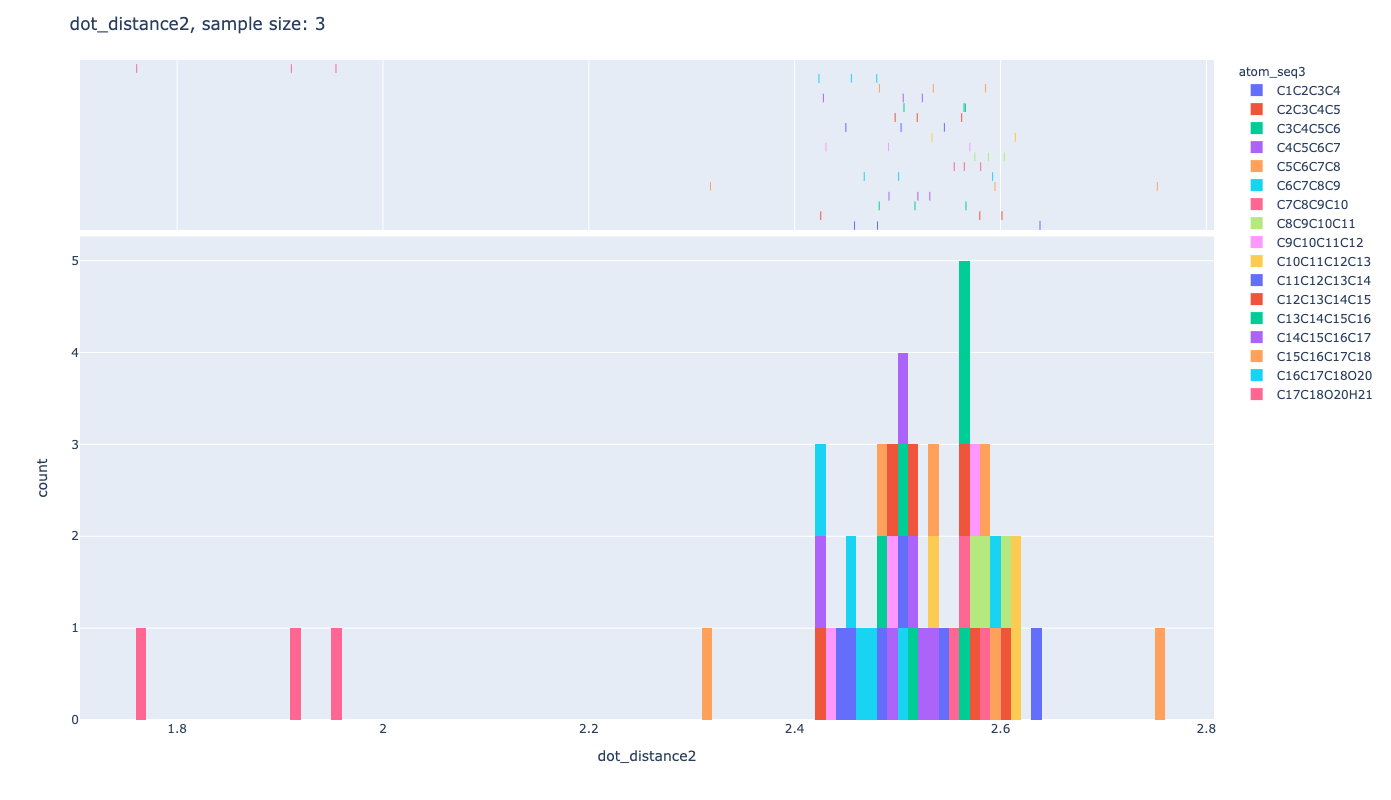

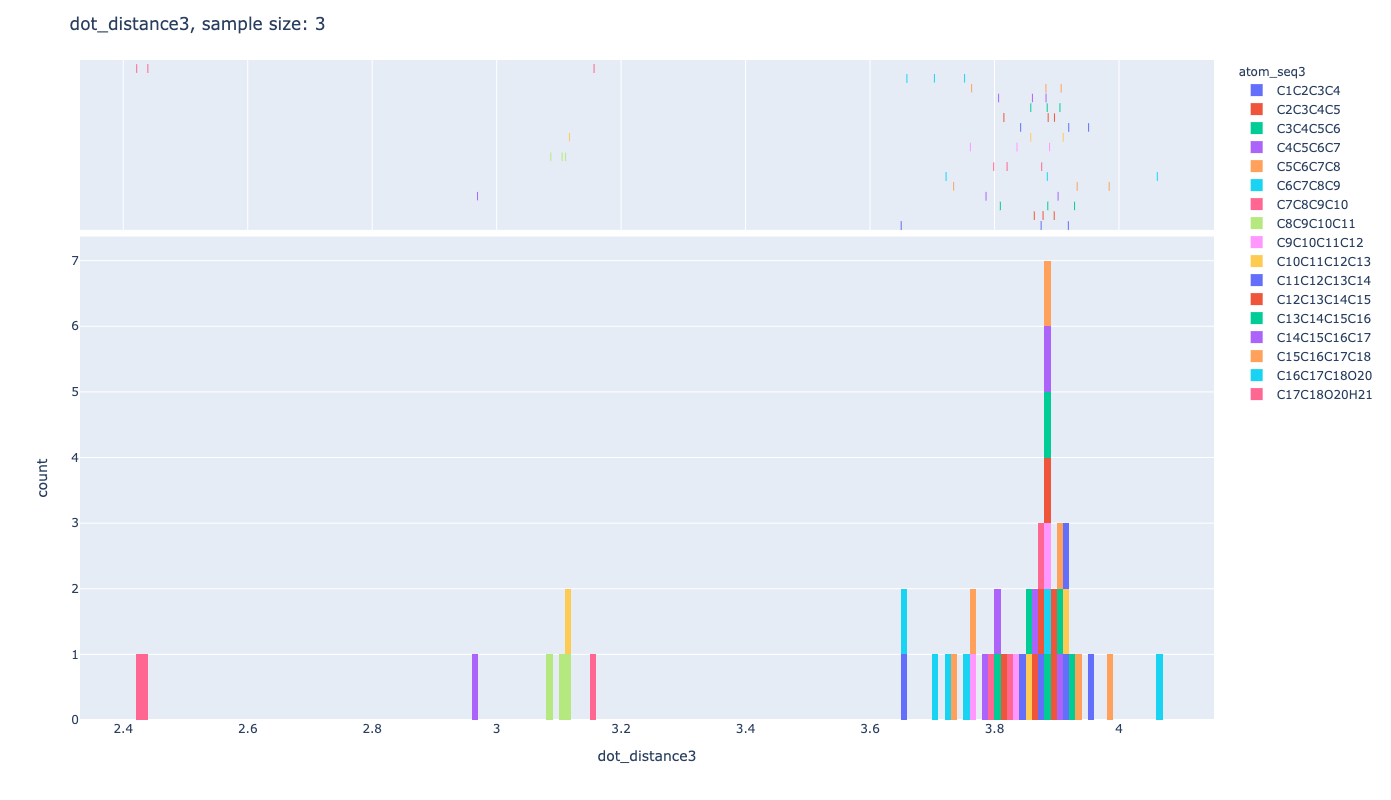

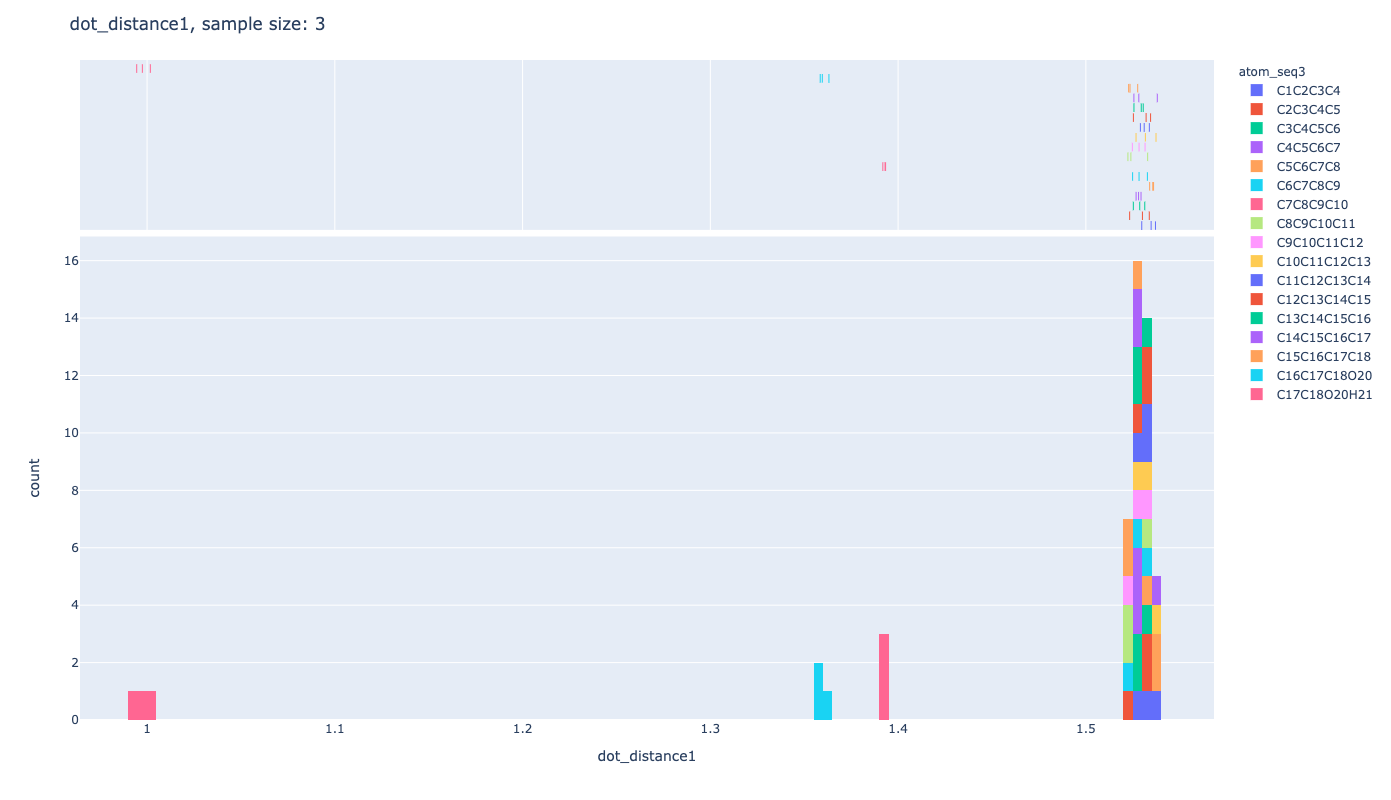

In [292]:
#protein_hist(df.dropna(),xlabel="dots-distance")
protein_hist(df.dropna(),xlabel="dot_distance2")
protein_hist(df.dropna(),xlabel="dot_distance3")
protein_hist(df.dropna(),xlabel="dot_distance1")
#protein_hist(df.dropna(),xlabel="dots-angle")
#protein_hist(df.dropna(),xlabel="planes-angle")

### Simulation

In [187]:
Cx = portein_format_list[0]['Cx']

In [188]:
protein_distr = [ df.loc[df['Cx']==c,['Cx','dots-angle','dots-distance','planes-angle']] for c in Cx ]
atom2distr = dict(zip(Cx, protein_distr))

In [189]:
def protine_sim(Cx, n_sim=1):
    sim_df = pd.concat([pd.concat([atom2distr[c][['Cx','dots-angle','dots-distance', 'planes-angle']].sample(n=1, random_state=x) for c in Cx]) for x in range(n_sim)])
    return(sim_df)

In [190]:
#protine_sim_df = protine_sim(Cx, n_sim=300)

C_tmp = ["C"+str(x) for x in range(1,19)]
C_tmp

['C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'C6',
 'C7',
 'C8',
 'C9',
 'C10',
 'C11',
 'C12',
 'C13',
 'C14',
 'C15',
 'C16',
 'C17',
 'C18']

In [191]:
protine_sim_df = protine_sim(C_tmp, n_sim=500)

display(protine_sim_df)
protine_sim_df.to_csv("output/simulated_data.csv")

,Cx,dots-angle,dots-distance,planes-angle
40,C1,0.000000,1.527514,0.000000
41,C2,115.646322,1.536912,0.000000
42,C3,106.559599,1.529771,176.428169
43,C4,114.727982,1.533786,167.664707
44,C5,108.465842,1.525287,177.132258
...,...,...,...,...
333,C14,115.568725,1.531796,177.606354
334,C15,113.784359,1.526467,179.394319
335,C16,108.158060,1.524467,168.225539
336,C17,115.136978,1.533428,173.076371


In [192]:
def protein_sim_plot(df,xlabel="dots-angle",):
    n_sim = sum(protine_sim_df['Cx'] == 'C8')
    fig = px.histogram(df, x=xlabel, color="Cx", nbins=100,marginal="rug")
    fig.update_layout(title="Simulated {0}, n_sim: {1}".format(xlabel, n_sim))
    fig.update_layout(width=1200, height=800)
    fig.show()
    pio.write_html(fig, "output/{}_sim.html".format(xlabel))
    pio.write_image(fig, "output/{}_sim.png".format(xlabel))

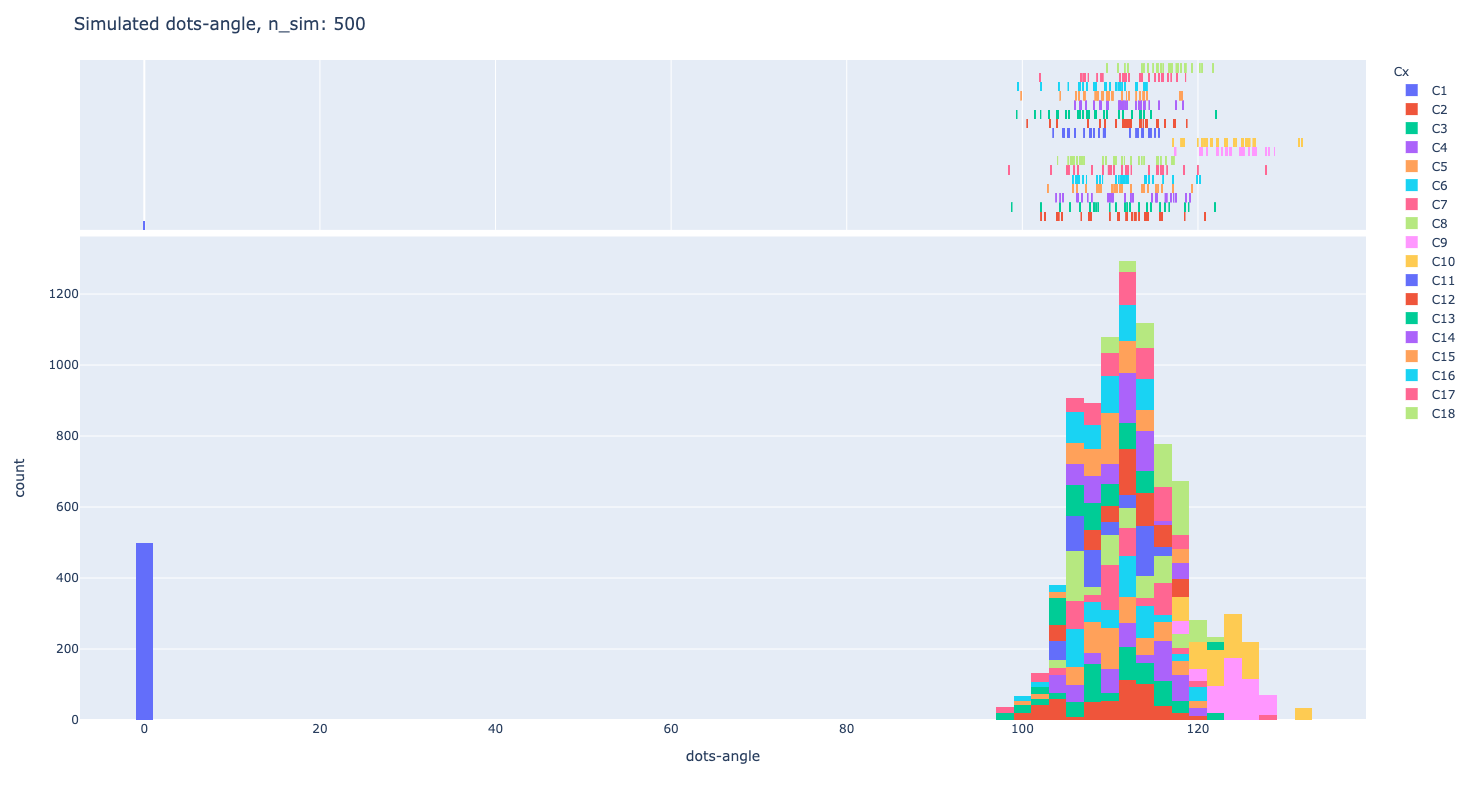

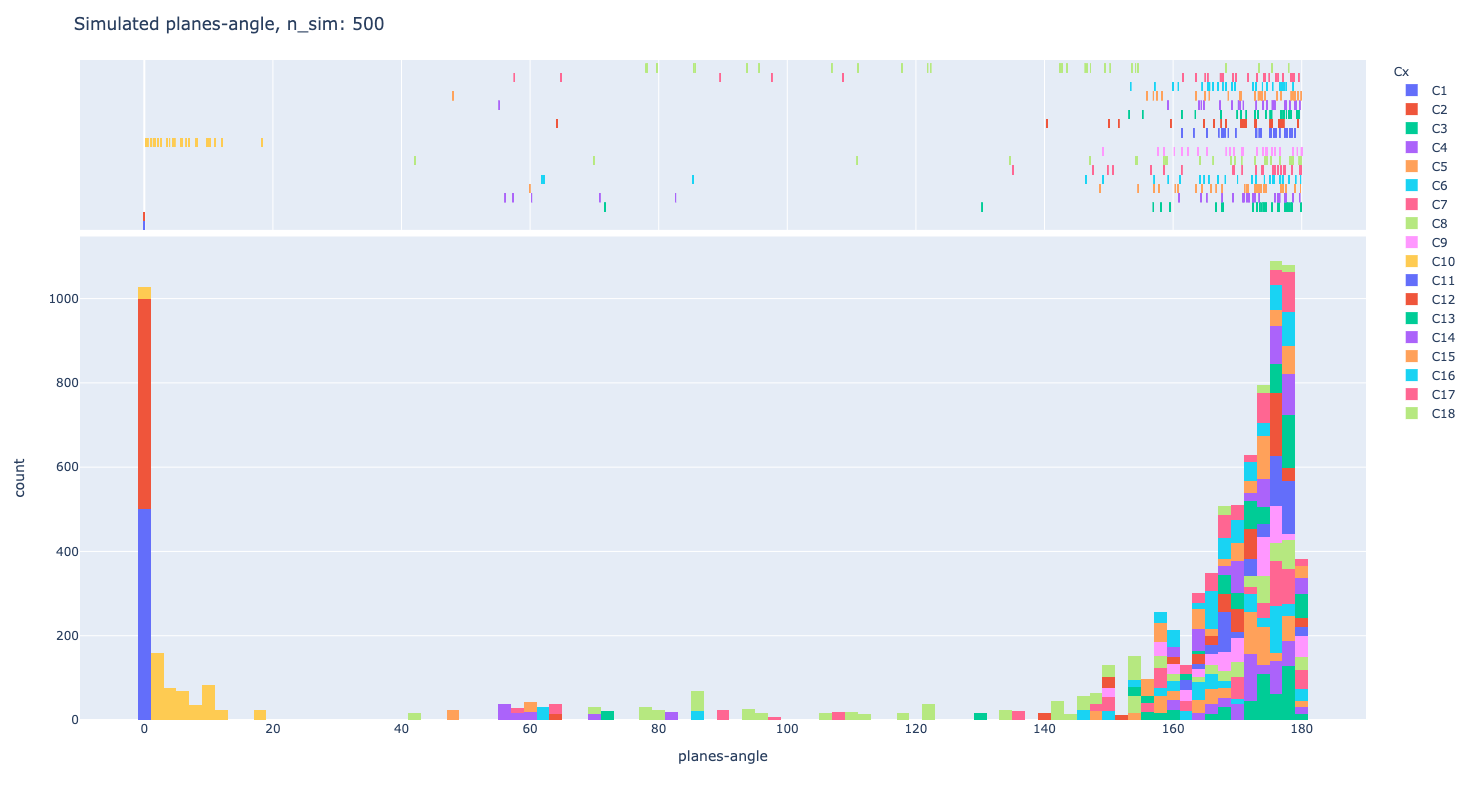

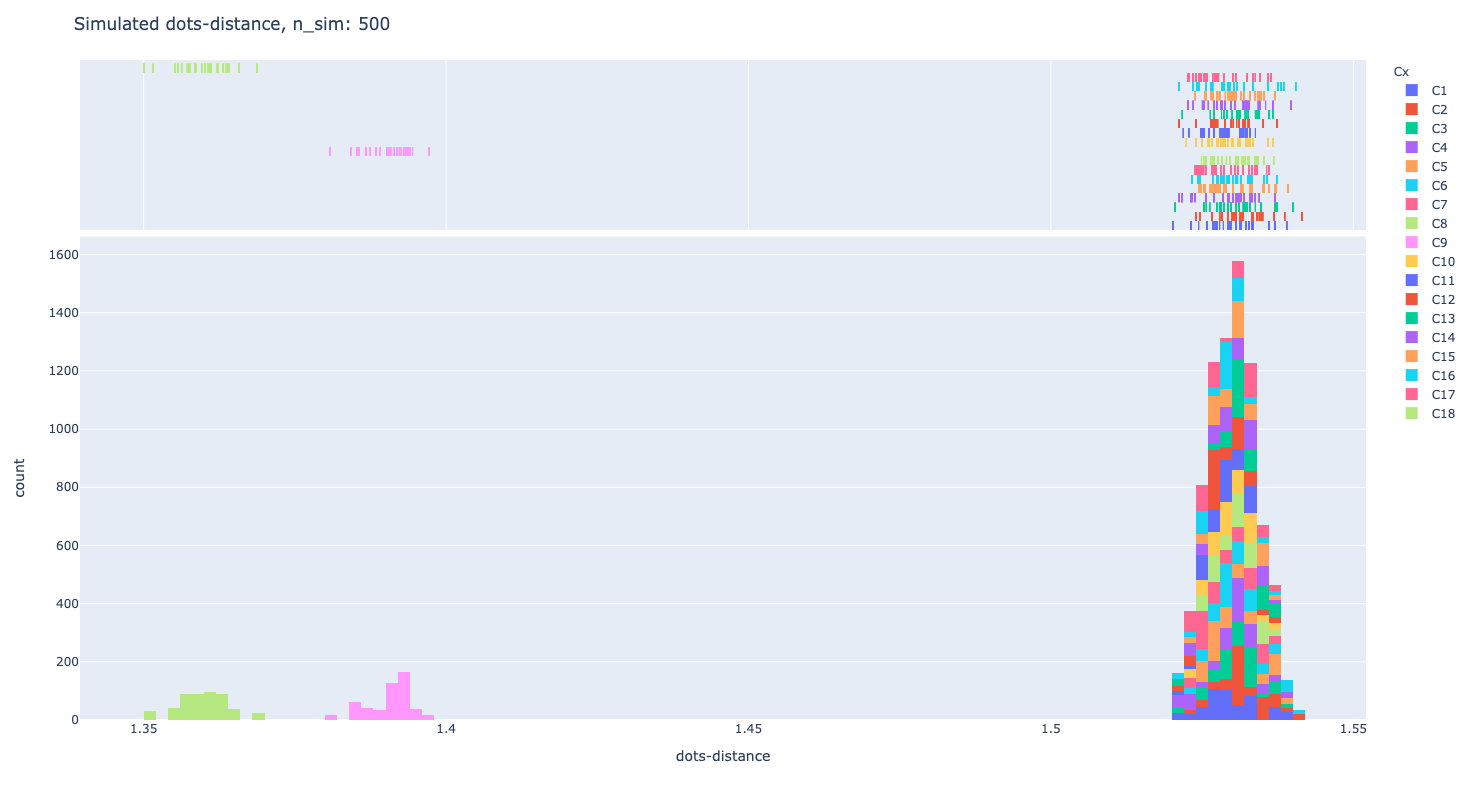

In [193]:
protein_sim_plot(protine_sim_df,xlabel="dots-angle")
protein_sim_plot(protine_sim_df,xlabel="planes-angle")
protein_sim_plot(protine_sim_df,xlabel="dots-distance")

In [194]:
import os
os.system("gsutil -m cp output/*.html gs://protein-dynamics-ai/")
os.system("gsutil -m cp output/*.png gs://protein-dynamics-ai/")
os.system("gsutil -m cp output/*.csv gs://protein-dynamics-ai/")

30720

dot_length  = (C, D)

dot_angle   = (B, C, D)

plane_angle = (A, B, C, D)
